## The Future of Energy in Spain

This dataset contains 4 years of electrical consumption, generation and pricing data for Spain. The rows contain information for every hour. The goal is to present the analysis to a technical audience who might then be able to use these insights to perform further analysis as they see fit. 

Through this notebook we explore the energy data set and try and raise some interesting questions that the data might throw at us at an initial glance.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
energy_df = pd.read_csv("energy_dataset.csv")

In [74]:
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [75]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [76]:
energy_df.time.unique()

array(['2015-01-01 00:00:00+01:00', '2015-01-01 01:00:00+01:00',
       '2015-01-01 02:00:00+01:00', ..., '2018-12-31 21:00:00+01:00',
       '2018-12-31 22:00:00+01:00', '2018-12-31 23:00:00+01:00'],
      dtype=object)

A quick glance at the data set shows the different attributes we have in the data set. For starters we can say that this table is very versatile in the sense that this information can be useful to answer a host of questions. Questions related to what though? 

 - Analysis of different sources of energy in Spain?
 - How much of Spain's Energy comes from Sustainable vs Non-Sustainable energy resources? 
 - How does the load forecast fare vs the actual load? If there is a significant difference, what can be the reason? 
 

In [77]:
# Lets analyze the time information to see over what years is the information spread out
energy_df['time'] = pd.to_datetime(energy_df['time'], utc = 'True')

In [78]:
energy_df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [79]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil coal-derived gas           35046 non-null  float64            
 4   generation fossil gas                        35046 non-null  float64            
 5   generation fossil hard coal                  35046 non-null  float64            
 6   generation fossil oil                        35045 non-null  float64            
 7   generation fossil oil shale                  35046 non-null  float64            
 8   generation fossil peat    

In [80]:
energy_df['time'].unique()

<DatetimeArray>
['2014-12-31 23:00:00+00:00', '2015-01-01 00:00:00+00:00',
 '2015-01-01 01:00:00+00:00', '2015-01-01 02:00:00+00:00',
 '2015-01-01 03:00:00+00:00', '2015-01-01 04:00:00+00:00',
 '2015-01-01 05:00:00+00:00', '2015-01-01 06:00:00+00:00',
 '2015-01-01 07:00:00+00:00', '2015-01-01 08:00:00+00:00',
 ...
 '2018-12-31 13:00:00+00:00', '2018-12-31 14:00:00+00:00',
 '2018-12-31 15:00:00+00:00', '2018-12-31 16:00:00+00:00',
 '2018-12-31 17:00:00+00:00', '2018-12-31 18:00:00+00:00',
 '2018-12-31 19:00:00+00:00', '2018-12-31 20:00:00+00:00',
 '2018-12-31 21:00:00+00:00', '2018-12-31 22:00:00+00:00']
Length: 35064, dtype: datetime64[ns, UTC]

In [81]:
from datetime import datetime

In [82]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype              
---  ------                                       --------------  -----              
 0   time                                         35064 non-null  datetime64[ns, UTC]
 1   generation biomass                           35045 non-null  float64            
 2   generation fossil brown coal/lignite         35046 non-null  float64            
 3   generation fossil coal-derived gas           35046 non-null  float64            
 4   generation fossil gas                        35046 non-null  float64            
 5   generation fossil hard coal                  35046 non-null  float64            
 6   generation fossil oil                        35045 non-null  float64            
 7   generation fossil oil shale                  35046 non-null  float64            
 8   generation fossil peat    

In [83]:
energy_df['year'] = energy_df['time'].dt.year

In [84]:
energy_df = energy_df[1:]

In [85]:
energy_df['year'].value_counts()

2016    8784
2015    8760
2017    8760
2018    8759
Name: year, dtype: int64

We see that the the information is for a period of 4 years. 
Now that we have extracted the year, lets do an initial few visualizations to get an insight into Spain's main sources of energy

In [86]:
energy_year = energy_df.drop(columns = ['time', 'price day ahead', 'price actual'])
energy_year.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,year
1,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,50.0,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,2015
2,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,50.0,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,2015
3,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,50.0,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,2015
4,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,42.0,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,2015
5,410.0,178.0,0.0,4038.0,3590.0,156.0,0.0,0.0,0.0,NaN,...,34.0,188.0,0.0,4618.0,4.0,NaN,4617.0,21441.0,19905.0,2015


In [87]:
energy_year = energy_year.groupby(by = 'year').sum()
energy_year.reset_index(inplace = True)
energy_year.head()

,year,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual
0,2015,4296887.0,4500640.0,0.0,44219558.0,46763558.0,2888127.0,0.0,0.0,0.0,...,605254.0,12740026.0,1951034.0,0.0,47892428.0,12721150.0,0.0,47962238.0,248827308.0,247654833.0
1,2016,3209693.0,3343805.0,0.0,45163854.0,32086575.0,2512780.0,0.0,0.0,0.0,...,708260.0,12347600.0,2267874.0,0.0,47565928.0,12412205.0,0.0,47600982.0,250475248.0,250270302.0
2,2017,2982499.0,4767198.0,0.0,56707674.0,37961816.0,2581870.0,0.0,0.0,0.0,...,830368.0,13097794.0,2607470.0,0.0,47140553.0,13104795.0,0.0,47171096.0,252820092.0,252729579.0
3,2018,2950706.0,3090711.0,0.0,50958528.0,32341310.0,2471678.0,0.0,0.0,0.0,...,857374.0,12023741.0,2616376.0,0.0,48902871.0,12221269.0,0.0,49101990.0,254613359.0,254516312.0


In [88]:
energy_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   year                                         4 non-null      int64  
 1   generation biomass                           4 non-null      float64
 2   generation fossil brown coal/lignite         4 non-null      float64
 3   generation fossil coal-derived gas           4 non-null      float64
 4   generation fossil gas                        4 non-null      float64
 5   generation fossil hard coal                  4 non-null      float64
 6   generation fossil oil                        4 non-null      float64
 7   generation fossil oil shale                  4 non-null      float64
 8   generation fossil peat                       4 non-null      float64
 9   generation geothermal                        4 non-null      float64
 10  genera

In [89]:
pos = [i for i in range(2,9)]
fossil_columns = list(energy_year.columns[pos])
print(fossil_columns)

['generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation fossil oil shale', 'generation fossil peat']


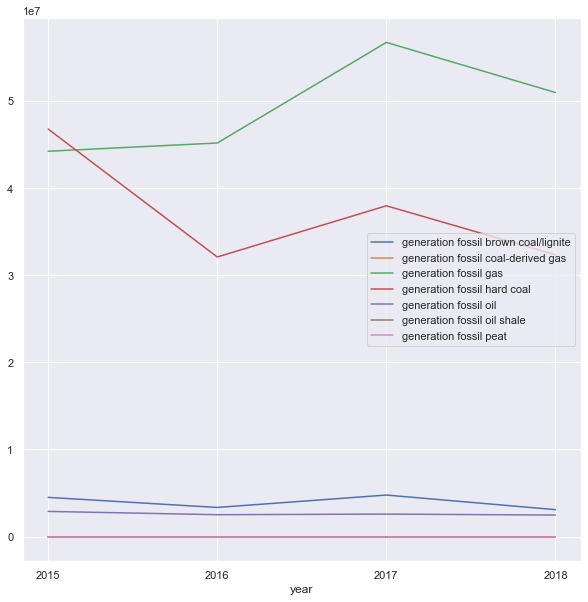

In [104]:
f = energy_year.plot(x = 'year', y = fossil_columns, figsize = (10, 10), grid = True)
f.set_xticks(energy_year['year']);

As we can see that majority of the fossil generation comes from sources like fossil gas and coal while a very small portion comes from other non-renewable energy resources. 

Likewise analyszing energy generation for the renewable energy resources.

In [91]:
pos1 = [i for i in range(10,22)]
green_columns = list(energy_year.columns[pos1])
print(green_columns)

['generation hydro pumped storage aggregated', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation marine', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind offshore', 'generation wind onshore']


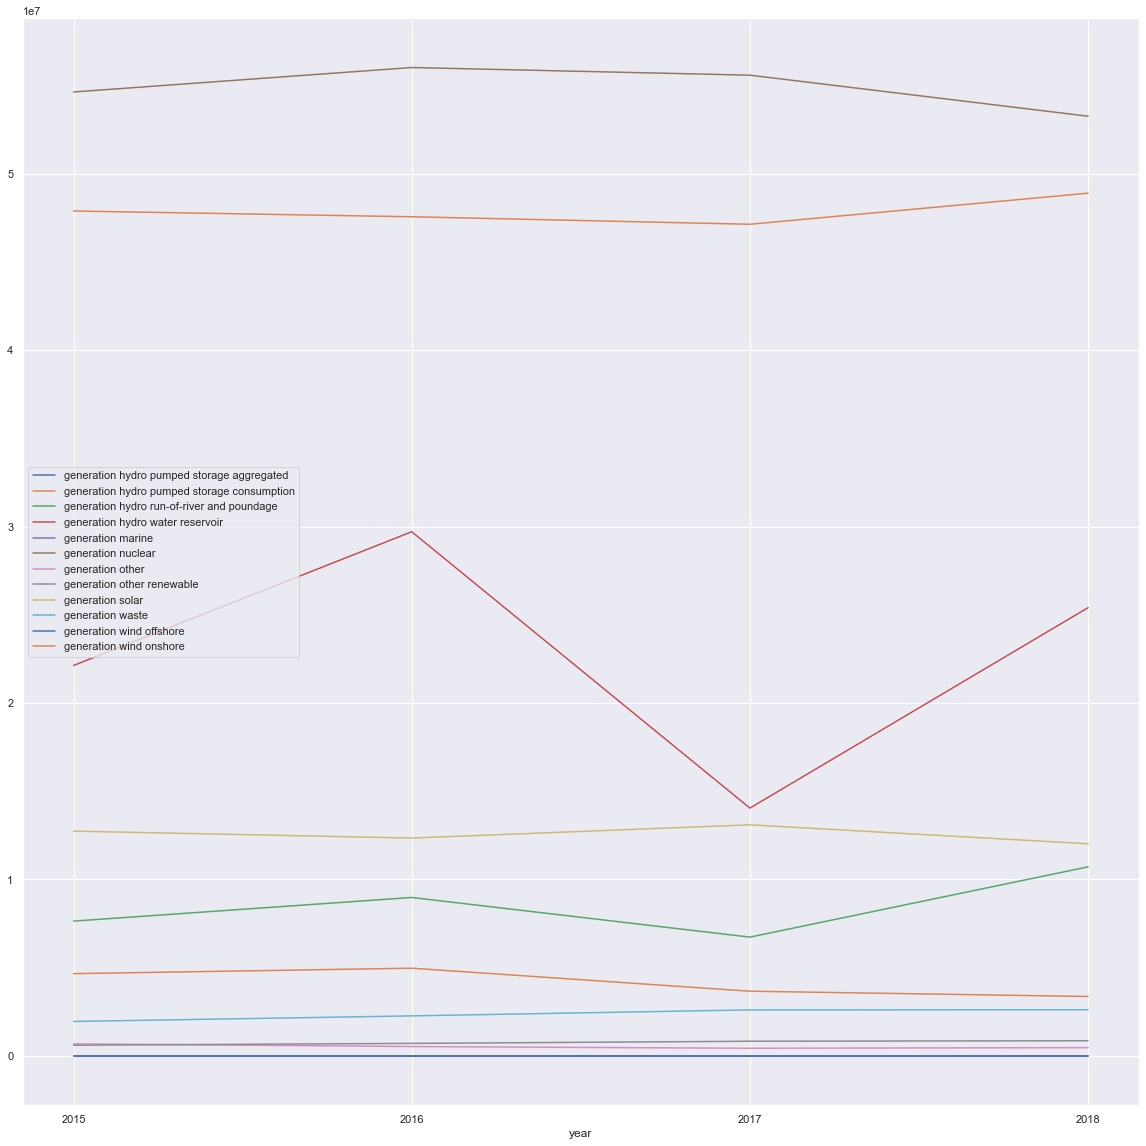

In [92]:
g = energy_year.plot(x = 'year', y = green_columns, figsize = (20,20), grid = True)
g.set_xticks(energy_year['year']);

The plot above shows that nuclear seems to be the highest followed by hydro pumped storage. Hydro reservoirs show an interesting trend having peaked in the year 2016 and then dropped the following year and picked back up in 2018. Solar seems to be have been fairly constant between 2015 to 2018. 

The above plots can be used to raise some interesting questions. But to whom might these trends be of value? 
The target audience here could be very diverse. For example Utilities and companies working to increase adoption of renewable energy. 
Some questions that we can ask are - 
1) What is the most underutilized resource of renewable energy in Spain? And what can be done about that? 

2) Likewise what is the most utilized energy resource? What are the factors for the increased adoption of that specific energy resource? 

3) We saw in increase in the adoption of hydro power in 2016 and a decrease in fossil fuel energy generation for the year 2016 and similarly a reverse trend for the year 2017. Thats interesting? What caused that change? Is it economical, polotical,or are there any other factors involved? 

4) Can we use this information to predict the generation in the upcoming years?

Moving forward lets focus on the load data provided.

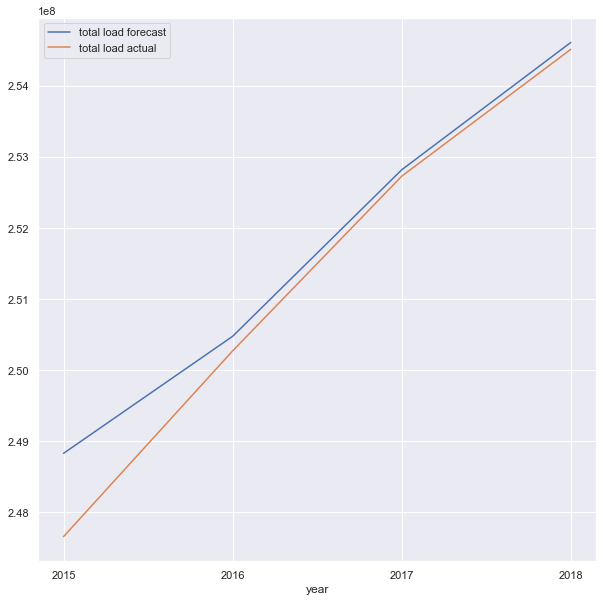

In [96]:
pos = [25,26]
load_columns = energy_year.columns[pos]
g2 = energy_year.plot(x = 'year', y = load_columns, figsize = (10,10), grid = True)
g2.set_xticks(energy_year['year']);

From the line plots above we can see that for each year the load forecast has been higher than the actual load consumed. On an annual basis while this appears to be the case, is it true for on a day-to-day basis? Thats another question to investigate? 

Is there a trend in demand variation - perhaps every quarter, season or even everyday? 

In [98]:
energy_pricing = energy_df[['year', 'price day ahead', 'price actual']]

In [101]:
energy_pricing = energy_pricing.groupby(by = 'year').mean()
energy_pricing.reset_index(inplace = True)
energy_pricing.head()

,year,price day ahead,price actual
0,2015,50.324661,61.359949
1,2016,39.668449,47.438307
2,2017,52.233312,59.321965
3,2018,57.299726,63.444265


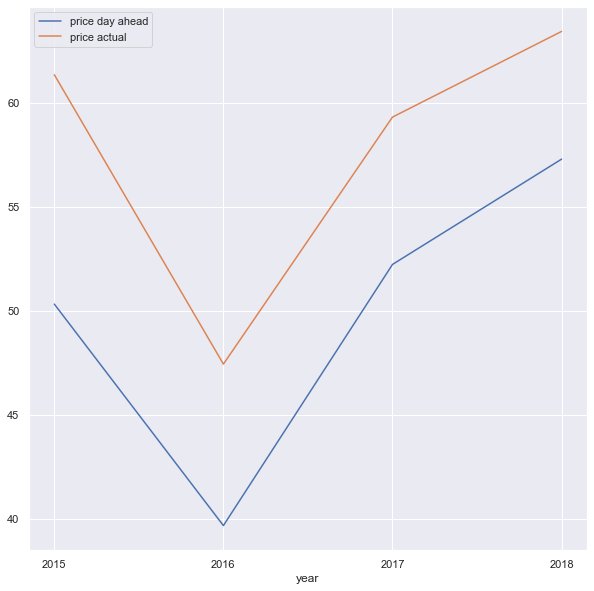

In [102]:
g3 = energy_pricing.plot(x = 'year', y = ['price day ahead','price actual'], figsize = (10,10), grid = True)
g3.set_xticks(energy_pricing['year']);

We note a similar trend in the shape of the pricing but also note that there is a signigicant difference in magnitude in the pricing forecast vs actual. 
This pegs the question - how is the price forecast calculated? Can a better model be developed to calculate teh value? 

In [106]:
## compare histograms of load and generation

"""we start by calculating the total generation for each ear and then comparing against the total load consumed 
each year"""
energy_year['total generation'] = energy_year.iloc[:, 1:22].sum(axis = 1)
energy_year.head()


## plot stacked bar chart based on generation resources

# Then just submit for now.

,year,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,total generation
0,2015,4296887.0,4500640.0,0.0,44219558.0,46763558.0,2888127.0,0.0,0.0,0.0,...,12740026.0,1951034.0,0.0,47892428.0,12721150.0,0.0,47962238.0,248827308.0,247654833.0,255611668.0
1,2016,3209693.0,3343805.0,0.0,45163854.0,32086575.0,2512780.0,0.0,0.0,0.0,...,12347600.0,2267874.0,0.0,47565928.0,12412205.0,0.0,47600982.0,250475248.0,250270302.0,249422438.0
2,2017,2982499.0,4767198.0,0.0,56707674.0,37961816.0,2581870.0,0.0,0.0,0.0,...,13097794.0,2607470.0,0.0,47140553.0,13104795.0,0.0,47171096.0,252820092.0,252729579.0,249144335.0
3,2018,2950706.0,3090711.0,0.0,50958528.0,32341310.0,2471678.0,0.0,0.0,0.0,...,12023741.0,2616376.0,0.0,48902871.0,12221269.0,0.0,49101990.0,254613359.0,254516312.0,249440214.0


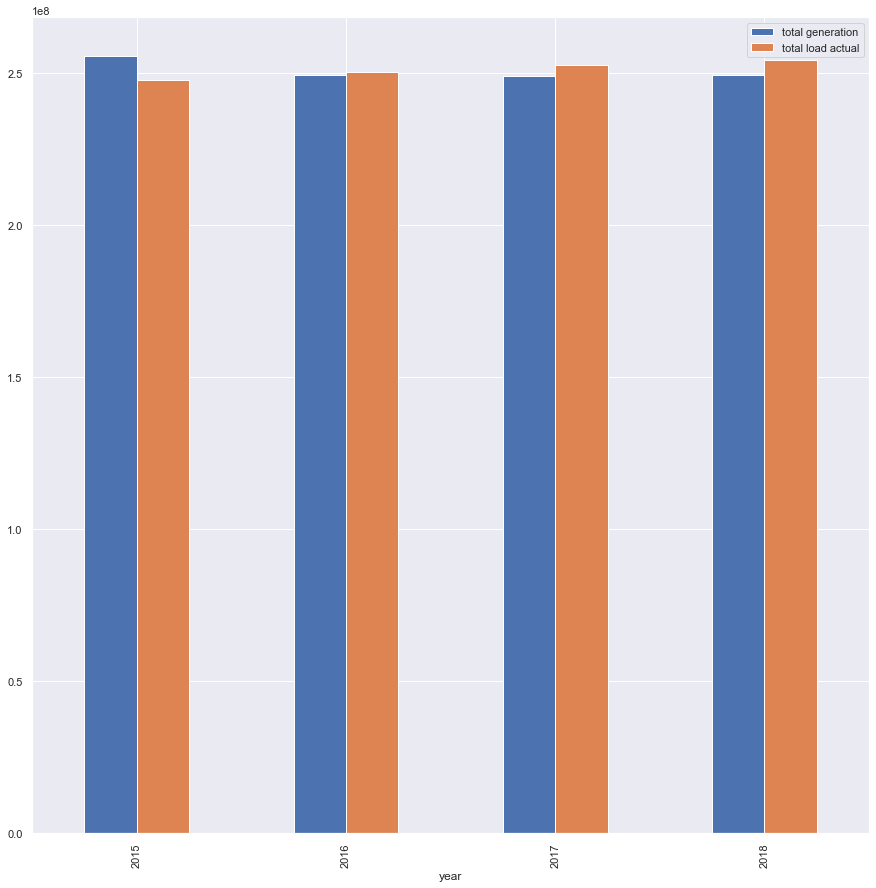

In [108]:
# plotting a bar chart of generation vs load
f2 = energy_year.plot(x = "year", y = ["total generation", "total load actual"], figsize = (15,15), kind = "bar")

The above plot gives an interesting insight into the load demand vs generation supply. It would be worth pondering about that fact that of the 4 years, 2015 was the only year where the generation was more than the load and each subsequent year the load has exceeded the generation. This is useful for Utility planners. 

1) What is the reason for the gap? Has Spains generation capabilities reduced? Or have the load requirments increased? 

2) What has caused the decrease in generation, or similarly what has caused the increase in load consumption?

3) Where has the deficit come from? And what can Spain do to be more self - sufficient?

In [125]:
energy_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 2015 to 2018
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   generation biomass                           4 non-null      float64
 1   generation fossil brown coal/lignite         4 non-null      float64
 2   generation fossil coal-derived gas           4 non-null      float64
 3   generation fossil gas                        4 non-null      float64
 4   generation fossil hard coal                  4 non-null      float64
 5   generation fossil oil                        4 non-null      float64
 6   generation fossil oil shale                  4 non-null      float64
 7   generation fossil peat                       4 non-null      float64
 8   generation geothermal                        4 non-null      float64
 9   generation hydro pumped storage aggregated   4 non-null      float64
 10  

Another useful insight might be to see each year, what is the contribution of each energy resource towards the total generation. For this we can plot a stacked bar chart of the relevant columns.

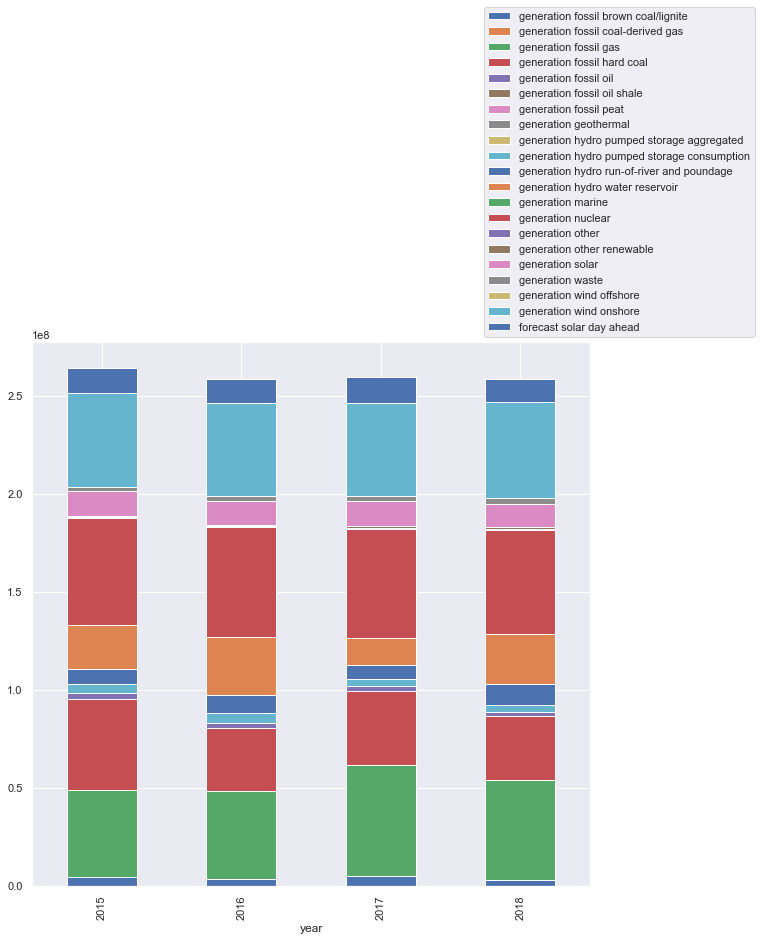

In [126]:
#energy_year = energy_year.set_index('year')
f3 = energy_year.iloc[:, 1:22].plot(kind = "bar", stacked = True, figsize = (10,10))

plt.legend(loc = "lower left", bbox_to_anchor = (0.8, 1))
#f3.set_xlabel(energy_year['year'])
plt.show()

The chart above shows that in the years being analysed, a major portion of the energy comes from coal, nuclear and fossil fuels. A fraction of the energy comes from renewable sources such as solar and hydro. Wind is a major significant renewable energy source. 

Some questions to ask here are : 

 - Can we forecast the energy output from Wind and Solar in the coming years? Can that be used to meet the increasing load demands and make Spain energy self-sufficient? 
 
 - Was the weather conducive for such siginificant wind energy output? Is Spain geograpically more suited for Wind energy than solar? If so, should utilities invest more resources in identifying optimal sites for developing more wind power plants? Can we look at the weather information and predict what the conditions might be like in the upcoming years, and use that informtion to predict the wind energy output? 
 
 As we can see the above table raises more questions than it answers, which is a good thing when it comes to Exploratory Data Analysis. Subsequent analysis can involve further investigating of other information such as weather information, and combining the two data sets to come up with some data driven solutions.